In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [155]:
#df = pd.read_csv('data/zippedData/tn.movie_budgets.csv')

In [252]:
#tmdsb = pd.read_csv('tmdb.movies.csv.gz')
#tmdsb.head()

In [253]:
#high_popularity= tmdsb.sort_values(by= ['popularity', 'vote_count', 'vote_average'], ascending= False )
#high_popularity.head(30)
#based on this table, which is based on popularity, vote count, and vote average (in that order), it seems that the action
#genre is the most popular

In [165]:
tmdb_movies= pd.read_csv('tmdb_movies_data.csv')
tmdb_movies.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation S

In [166]:
tmdb_movies["genres"]= tmdb_movies["genres"].str.split("|")
tmdb_movie = tmdb_movies.explode('genres')
tmdb_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08


In [167]:
cleaned_tmdb= tmdb_movie.sort_values(by= ['vote_count', 'vote_average','popularity', 'revenue'], ascending= False)

In [168]:
cleaned_tmdb.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Action,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Thriller,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Science Fiction,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Mystery,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,"Cobb, a skilled thief who commits corporate es...",148,Adventure,Legendary Pictures|Warner Bros.|Syncopy,7/14/2010,9767,7.9,2010,160000000.0,8.255000e+08
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Science Fiction,Marvel Studios,4/25/2012,8903,7.3,2012,208943741.9,1.443191e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Action,Marvel Studios,4/25/2012,8903,7.3,2012,208943741.9,1.443191e+09
4361,24428,tt0848228,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,http://marvel.com/avengers_movie/,Joss Whedon,Some assembly required.,...,When an unexpected enemy emerges and threatens...,143,Adventure,Marvel Studios,4/25/2012,8903,7.3,2012,208943741.9,1.443191e+09
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Action,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,240886902.9,2.827124e+09
1386,19995,tt0499549,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,http://www.avatarmovie.com/,James Cameron,Enter the World of Pandora.,...,"In the 22nd century, a paraplegic Marine is di...",162,Adventure,Ingenious Film Partners|Twentieth Century Fox ...,12/10/2009,8458,7.1,2009,240886902.9,2.827124e+09


In [169]:
cleaned_tmdbs= cleaned_tmdb.drop(['cast', 'homepage', 'tagline', 'overview', 'production_companies', 'keywords'], axis=1)
cleaned_tmdbs.head()
#We got rid of columns that were not needed in order for us to make conclusions on the data

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Action,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Thriller,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Science Fiction,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Mystery,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Adventure,7/14/2010,9767,7.9,2010,160000000.0,825500000.0


In [170]:
cleaned_tmdbs_filtered= cleaned_tmdbs[cleaned_tmdbs['budget'] >= 5]
#filtering through the data to get rid of rows that have null values or zero put in as a placeholder for budget and revenue33

In [171]:
cleaned_tmdbs_filtered

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Action,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Thriller,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Science Fiction,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Mystery,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Adventure,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2855,19058,tt0247303,0.128169,15000000,163169,Down,Dick Maas,111,Thriller,5/11/2001,10,3.7,2001,1.847232e+07,2.009407e+05
1880,20236,tt1182609,0.077477,6000000,0,Direct Contact,Danny Lerner,90,Action,4/16/2009,10,3.5,2009,6.098403e+06,0.000000e+00
1880,20236,tt1182609,0.077477,6000000,0,Direct Contact,Danny Lerner,90,Adventure,4/16/2009,10,3.5,2009,6.098403e+06,0.000000e+00
1880,20236,tt1182609,0.077477,6000000,0,Direct Contact,Danny Lerner,90,Thriller,4/16/2009,10,3.5,2009,6.098403e+06,0.000000e+00


In [172]:
cleaned_revenue = cleaned_tmdbs[cleaned_tmdbs.revenue != 0]
filtered_tmdbs= cleaned_revenue[cleaned_revenue.budget !=0 ]

In [173]:

filtered_tmdbs
#got rid of all movies that had 0 for either budget or revenue

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Action,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Thriller,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Science Fiction,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Mystery,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Adventure,7/14/2010,9767,7.9,2010,1.600000e+08,8.255000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,11221,tt0086955,0.174241,18000000,19265302,Best Defense,Willard Huyck,94,Comedy,7/20/1984,10,3.8,1984,3.778276e+07,4.043868e+07
2855,19058,tt0247303,0.128169,15000000,163169,Down,Dick Maas,111,Action,5/11/2001,10,3.7,2001,1.847232e+07,2.009407e+05
2855,19058,tt0247303,0.128169,15000000,163169,Down,Dick Maas,111,Horror,5/11/2001,10,3.7,2001,1.847232e+07,2.009407e+05
2855,19058,tt0247303,0.128169,15000000,163169,Down,Dick Maas,111,Mystery,5/11/2001,10,3.7,2001,1.847232e+07,2.009407e+05


In [174]:
filtered_tmbdbs=filtered_tmdbs[(np.abs(stats.zscore(filtered_tmdbs['vote_count'])) <3)]
filtered_tmbdbs= filtered_tmdbs[(np.abs(stats.zscore(filtered_tmdbs['vote_count']))> -3)]
filtered_tmdbs.head()
#getting rid of major outliers that were skewing the data

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Action,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Thriller,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Science Fiction,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Mystery,7/14/2010,9767,7.9,2010,160000000.0,825500000.0
1919,27205,tt1375666,9.363643,160000000,825500000,Inception,Christopher Nolan,148,Adventure,7/14/2010,9767,7.9,2010,160000000.0,825500000.0


In [255]:
genre_rec = filtered_tmdbs.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
genre_rec.name = 'genre'
genre_recs = filtered_tmdbs.drop('genres', axis=1).join(genre_rec)


In [259]:
def build_chart(genre, percentile=0.85):
    df = genre_recs[genre_recs['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['original_title', 'release_year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    
    
    return qualified


In [260]:
build_chart('comedy').head(15)

KeyError: "['original_title'] not in index"

In [258]:
filtered_tmdbs.set_index('original_title', inplace= True
#Set the index to the title to make it easier to pull values from different columns



SyntaxError: unexpected EOF while parsing (<ipython-input-258-580c49a2813a>, line 3)

In [45]:
#filtered_tmdbs['genres']= filtered_tmdbs['genres'].str.split("|", n= 1, expand = True)
#filtered_tmdbs.head(20)

In [ ]:
def searchByGenre(genre):
    number = 0
    count = 0
    for each in filtered_tmdbs['genres']:
        if genre in each:
            count += 1
    return count
print(searchByGenre('Crime'))

In [182]:
genre_mean= filtered_tmdbs.groupby(['genres']).mean()
#just trying to find a way to find the genre with the highest vote counts and averages. I think this works we'll see
#ask how to get genres sorted

In [183]:
genre_mean.head(20)
#finally got the genres in one word, so I'm going to make a visualization on the average vote_average for each genre!

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,,
Action,32862.453959,1.566222,5.641610e+07,1.564339e+08,111.645488,804.016575,6.036004,2000.690608,6.640907e+07,1.952089e+08
Adventure,31810.459279,1.867693,6.993891e+07,2.182919e+08,112.615487,956.293725,6.124433,2000.178905,8.125573e+07,2.714075e+08
Animation,43459.000000,1.710622,7.693647e+07,2.571215e+08,89.228856,888.885572,6.380597,2003.930348,8.347215e+07,2.909574e+08
Comedy,37314.684831,1.012321,3.310906e+07,9.733657e+07,101.650957,396.173785,6.026436,2001.655376,3.917646e+07,1.213085e+08
Crime,33579.398773,1.123152,3.303109e+07,8.401552e+07,111.523006,519.664110,6.298620,2000.682515,3.989487e+07,1.102273e+08
Documentary,28257.028571,0.294458,4.852976e+06,2.252440e+07,101.428571,68.628571,6.660000,2004.742857,5.379702e+06,2.480617e+07
Drama,43316.577689,1.001181,2.805349e+07,7.428551e+07,115.892430,413.547524,6.395959,2001.393853,3.470978e+07,1.013213e+08
Family,33711.256471,1.459043,6.247916e+07,2.031535e+08,98.665882,679.800000,6.127059,2001.682353,7.110099e+07,2.437910e+08
Fantasy,28625.234848,1.754315,7.071740e+07,2.182341e+08,107.608586,898.520202,6.062879,2001.184343,8.023752e+07,2.499928e+08


In [204]:
genre_mean= genre_mean.rename(Science Fiction['Sci_Fi'])

NameError: name 'Science_Fiction' is not defined

In [186]:
vote_average = genre_mean['vote_average'].sort_values(ascending= False)
vote_average
#getting my variables together to make a graph

genres
Documentary        6.660000
War                6.586555
History            6.578295
Western            6.467308
Drama              6.395959
Animation          6.380597
Music              6.315441
Crime              6.298620
Mystery            6.194767
Romance            6.189955
Family             6.127059
Adventure          6.124433
Foreign            6.123077
Thriller           6.065892
Fantasy            6.062879
Action             6.036004
Science Fiction    6.027308
Comedy             6.026436
Horror             5.710799
TV Movie           5.600000
Name: vote_average, dtype: float64

Text(0.5, 1.0, 'Average Vote by Genre')

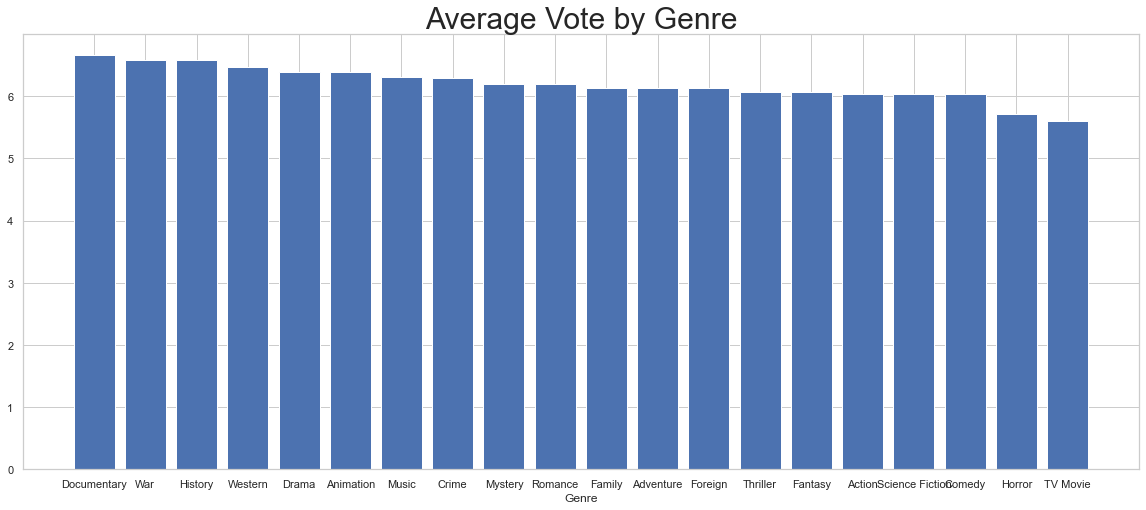

In [187]:
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(vote_average.index, vote_average)
ax.set_xlabel('Genre')
ax.set_title('Average Vote by Genre', fontsize= 30)
#Looking at the graph, there is not much variation within the dataset of average scores. My next visualization will look
#at the vote count which will give me more information on the more popular genres.

In [188]:
vote_count = genre_mean['vote_count'].sort_values(ascending= False)
vote_count

genres
Science Fiction    967.217308
Adventure          956.293725
Fantasy            898.520202
Animation          888.885572
Action             804.016575
Family             679.800000
War                563.394958
Western            548.307692
Thriller           547.220747
Crime              519.664110
Mystery            493.049419
History            415.038760
Drama              413.547524
Comedy             396.173785
Romance            343.956522
Horror             318.762419
Music              281.779412
Documentary         68.628571
TV Movie            35.000000
Foreign             26.538462
Name: vote_count, dtype: float64

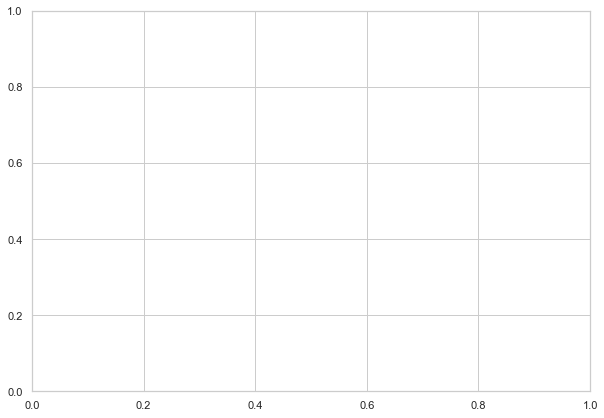

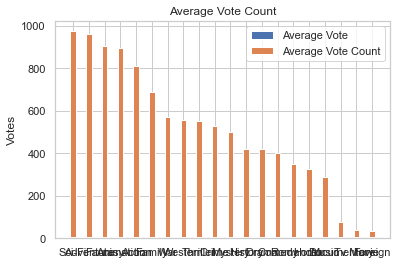

In [236]:
labels= ['Sci-Fi', 'Adventure', 'Fantasy', 'Animation', 'Action', 'Family', 'War', 'Western', 'Thriller', 'Crime', 'Mystery', 'History', 'Drama', 'Comedy', 'Romance', 'Horror', 'Music', 'Documentary', 'Tv Movie', 'Foreign']
avg_vote= [6.66000, 6.586555, 6.578295, 6.467308, 6.395959, 6.380597, 6.315441, 6.298620, 6.194767 ,6.189955, 6.127059, 
           6.124433, 6.123077,6.065892, 6.062879, 6.036004,6.027308, 6.026436,5.710799, 5.600000]
avg_count= [967.217308,956.293725,898.520202,888.885572, 804.016575, 679.800000, 563.394958,548.307692,547.220747, 519.664110,493.049419, 415.038760,413.547524, 396.173785, 343.956522, 318.762419,281.779412, 68.628571, 35.000000, 26.538462 ]
fig = plt.subplots(figsize =(10, 7))
width= 0.35
fig, ax = plt.subplots()
ax.bar(labels,avg_vote, width, label='Average Vote')
ax.bar(labels, avg_count, width, bottom=avg_vote, label='Average Vote Count')
 
ax.set_ylabel('Votes')
ax.set_title('Average Vote Count')
ax.legend()
 
plt.show()

Text(0.5, 1.0, 'Average Vote Count per Genre')

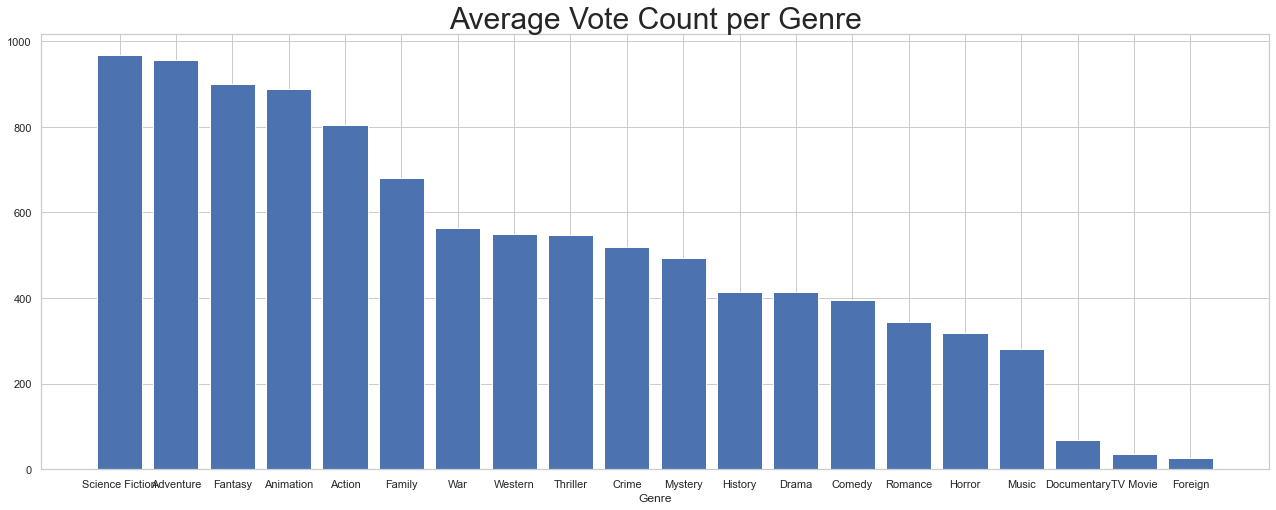

In [198]:
fig, ax = plt.subplots(figsize=(22,8))
ax.bar(vote_count.index, vote_count)
ax.set_xlabel('Genre')
ax.set_title('Average Vote Count per Genre', fontsize= 30)
#The vote count has alot more variation than the voting score data. You can look at vote count as a type of popularity 
#measure. The more votes it has, the more views it had.

<ipython-input-241-9c6b98c2dd58>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


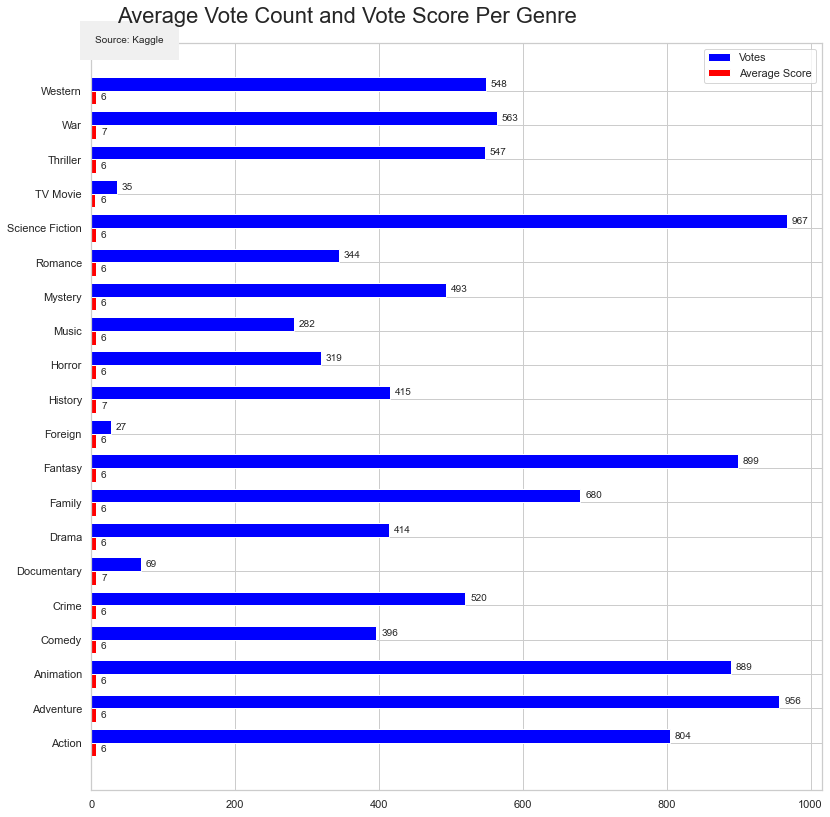

In [241]:
first_bar = genre_mean['vote_count']
first_bar_label = 'Votes'
first_bar_color = 'blue'
second_bar = genre_mean['vote_average']
second_bar_label = 'Average Score'
second_bar_color = 'red'
labels = genre_mean.index
width = 0.4  # the width of the bars
plot_title = 'Average Vote Count and Vote Score Per Genre'
title_size = 22
subtitle = 'Source: Kaggle'
fig, ax = plt.subplots(figsize=(16,12))
plt.tight_layout() #make the bars neater
# Plot double bars
y = np.arange(len(labels))  # Label locations
ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)
# Format ticks
#ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# Set title
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.35, 1])
# Adjust subplots
plt.subplots_adjust(left=0.35, top=0.9)
# Set subtitle
tform = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tform, bbox=dict(boxstyle='square, pad=1.5', fc='#F0F0F0', ec='none'))
# Create labels
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = '{:,.0f}'.format(x_value)
    plt.annotate(
        label,
        (x_value, y_value),
        xytext=(space, 0),
        textcoords='offset points',
        va='center',
        ha=ha)
# Set y-labels and legend
ax.set_yticklabels(labels)
ax.legend()
# To show each y-label, not just even ones
plt.yticks(np.arange(min(y), max(y)+1, 1.0));

<AxesSubplot:xlabel='vote_count', ylabel='vote_average'>

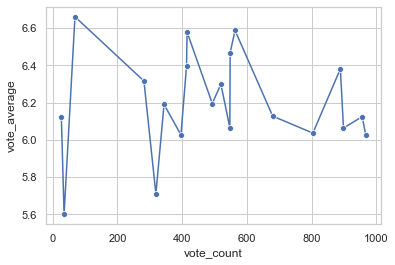

In [251]:
sns.lineplot(data= genre_mean, x= 'vote_count' , y='vote_average', marker= 'o')

#This graph shows the relationship between vote count and vote average and shows how having a higher vote count does not 
#necessarily mean that you will have a higher score 